In [698]:

import pandas as pd
import numpy as np

df = pd.read_csv('/Users/asik/Downloads/satellite.csv')
# check NA values
df.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
Class          0
dtype: int64

In [634]:
df['Class'] = df['Class'].replace({7 : 6})


In [635]:
X, y = df.drop("Class", axis = 1), df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)


In [636]:
#NN without normalization
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
NN_model = MLPClassifier(random_state=0, max_iter=1000)
NN_model.fit(X_train,y_train)

y_pred1=NN_model.predict(X_valid)
y_pred2=NN_model.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.8275862068965517
Accuracy of test set: 0.8090062111801242


In [690]:
train_error=[]
valid_error=[]
m=[1,1000,2000,3000,5000,6000]
for j in m:
    NN_model = MLPClassifier(random_state=42, max_iter=1000)
    NN_model.fit(X_train[:j],y_train[:j])
    y_pred1=NN_model.predict(X_valid)
    y_pred2=NN_model.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

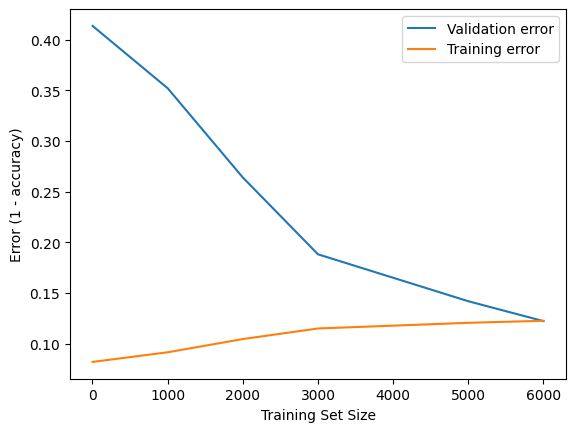

In [647]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [686]:
X, y = df.drop("Class", axis = 1), df["Class"]
#X, y = df.drop(["quality","Id"], axis = 1), df["quality"]
#normalization
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [687]:
# NN with normalization and dif parameters 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

NN_model = MLPClassifier(hidden_layer_sizes=(57,),random_state=0,max_iter=2000)
NN_model.fit(X_train,y_train)

y_pred1=NN_model.predict(X_valid)
y_pred2=NN_model.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.8981191222570533
Accuracy of test set: 0.906832298136646


In [688]:
train_error=[]
valid_error=[]
m=[1,1000,2000,3000,5000,6000]
for j in m:
    NN_model = MLPClassifier(hidden_layer_sizes=(57,),random_state=0, max_iter=1000)
    NN_model.fit(X_train[:j],y_train[:j])
    y_pred1=NN_model.predict(X_valid)
    y_pred2=NN_model.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

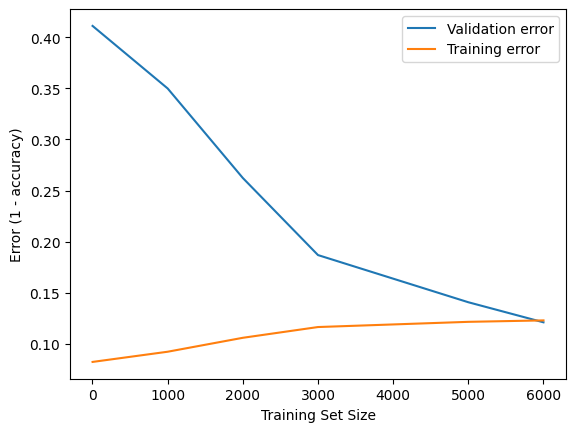

In [689]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [662]:

df = pd.read_csv('/Users/asik/Downloads/satellite.csv')
df['Class'] = df['Class'].replace({7 : 6})
X, y = df.drop("Class", axis = 1), df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [663]:
#Decision tree without normalization
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.8824451410658307
Accuracy of test set: 0.8788819875776398


In [665]:
train_error=[]
valid_error=[]
m=[100,1000,2000,3000,5000,6000]
for j in m:
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[:j],y_train[:j])
    
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

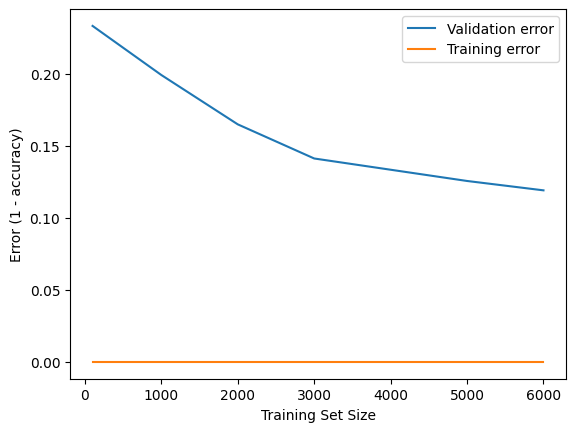

In [666]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [691]:
X, y = df.drop("Class", axis = 1), df["Class"]

#normalization
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [692]:
#Decision tree with normalization
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0,max_depth=9)
clf.fit(X_train,y_train)

y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.8996865203761756
Accuracy of test set: 0.8726708074534162


In [693]:
train_error=[]
valid_error=[]
m=[100,1000,2000,3000,5000,6000]
for j in m:
    clf = DecisionTreeClassifier(random_state=0,max_depth=9)
    clf.fit(X_train[:j],y_train[:j])
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

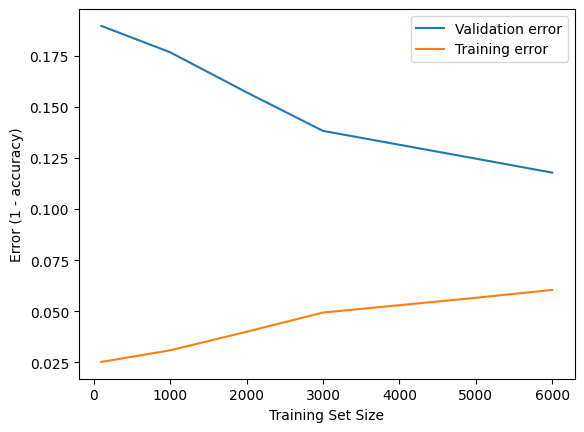

In [694]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [670]:

df = pd.read_csv('/Users/asik/Downloads/satellite.csv')
df['Class'] = df['Class'].replace({7 : 6})
X, y = df.drop("Class", axis = 1), df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [671]:
#Random Forest without normalization
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.932601880877743
Accuracy of test set: 0.9332298136645962


In [672]:
train_error=[]
valid_error=[]
m=[100,1000,2000,3000,5000,6000]
for j in m:
    clf = RandomForestClassifier(max_depth=15, random_state=0)
    clf.fit(X_train[:j],y_train[:j])
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

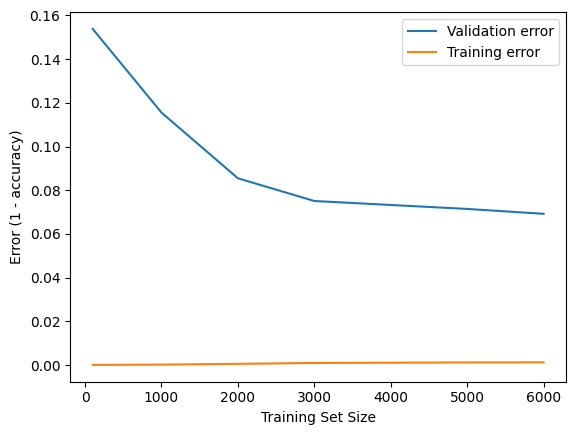

In [673]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [674]:
X, y = df.drop("Class", axis = 1), df["Class"]
#normalization
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [675]:
#Random Forest with normalization
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.9294670846394985
Accuracy of test set: 0.9332298136645962


In [676]:
train_error=[]
valid_error=[]
m=[1,1000,2000,3000,5000,6000]
for j in m:
    clf = RandomForestClassifier(max_depth=15, random_state=0)
    clf.fit(X_train[:j],y_train[:j])
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)


Text(0, 0.5, 'Error (1 - accuracy)')

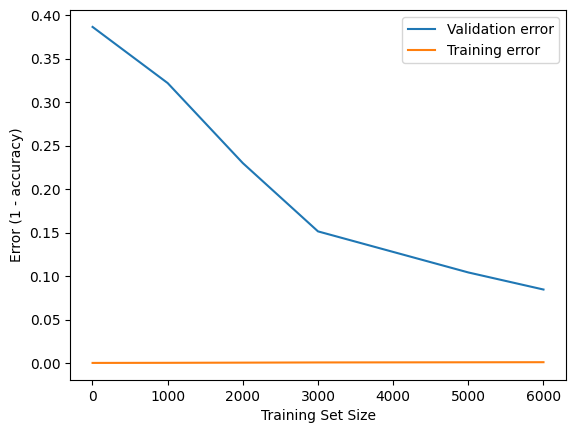

In [600]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [677]:

df = pd.read_csv('/Users/asik/Downloads/satellite.csv')
df['Class'] = df['Class'].replace({7 : 6})
X, y = df.drop("Class", axis = 1), df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [680]:
#Gradient boosting without normalization
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.6332288401253918
Accuracy of test set: 0.6304347826086957


In [681]:
train_error=[]
valid_error=[]
m=[10,1000,2000,3000,5000,6000]
for j in m:
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001,max_depth=1, random_state=0)
    clf.fit(X_train[:j],y_train[:j])
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)

Text(0, 0.5, 'Error (1 - accuracy)')

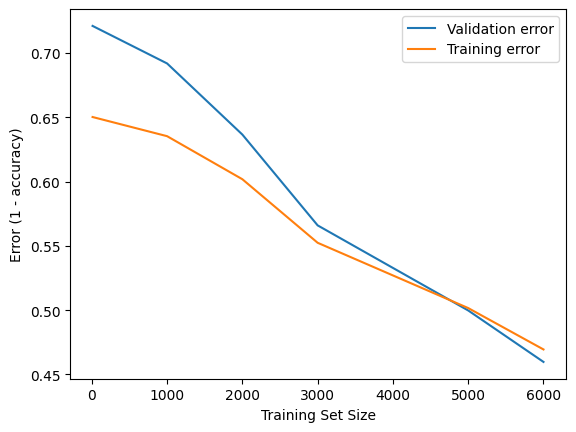

In [682]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [695]:
X, y = df.drop("Class", axis = 1), df["Class"]
#normalization
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

In [696]:
#Gradient boosting with normalization
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_valid)
y_pred2 = clf.predict(X_test)

accuracy1=accuracy_score(y_pred1,y_valid)
accuracy2=accuracy_score(y_pred2,y_test)
print('Accuracy of validation set:',accuracy1)
print('Accuracy of test set:',accuracy2)

Accuracy of validation set: 0.9106583072100314
Accuracy of test set: 0.9083850931677019


In [697]:
train_error=[]
valid_error=[]
m=[10,1000,2000,3000,5000,6000]
for j in m:
    clf=GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1, random_state=0)
    clf.fit(X_train[:j],y_train[:j])
    y_pred1=clf.predict(X_valid)
    y_pred2=clf.predict(X_train[:j])
    accuracy1=accuracy_score(y_pred1,y_valid)
    accuracy2=accuracy_score(y_pred2,y_train[:j])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)

Text(0, 0.5, 'Error (1 - accuracy)')

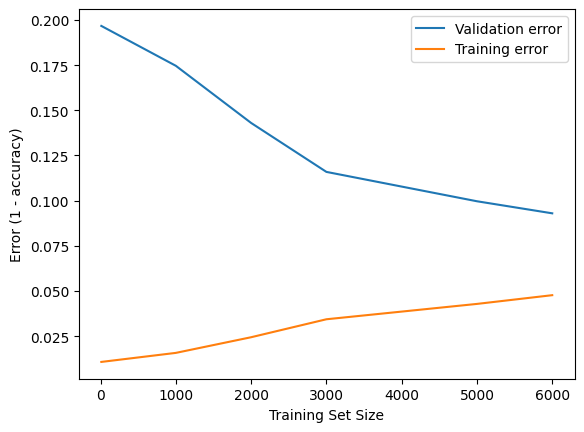

In [535]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')